In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

#  feature Scacling
 * 1)starnderscaling:
 * 2)Normalizetion:


In [3]:
df = pd.read_csv('data/Social_Network_Ads.txt')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
285,37,93000,1
19,48,29000,1
289,37,78000,1
151,41,45000,0
133,21,68000,0


### Split the data 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## 1)Standerd Scaling:


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)


X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [12]:
X_train_scaler

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [22]:
X_train_scaler

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [23]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [25]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

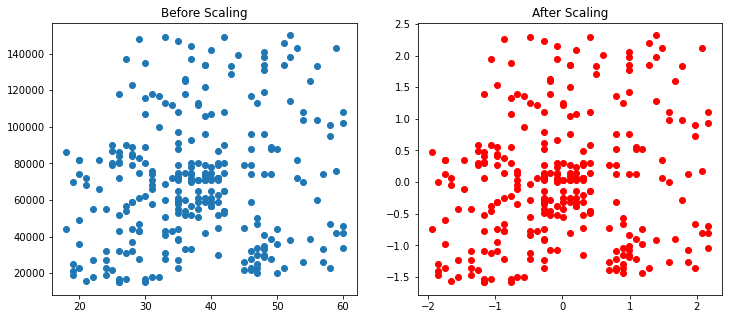

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

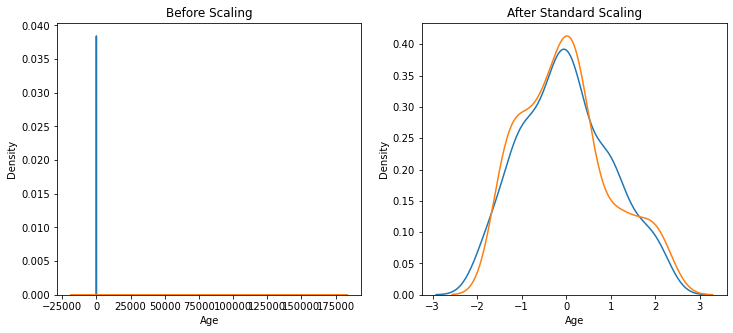

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributions.

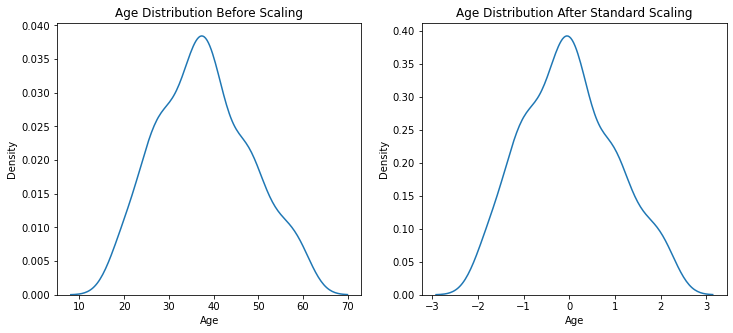

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

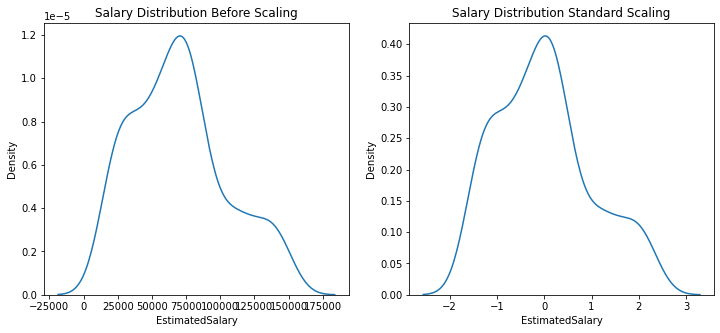

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

##  Why scaling is important?

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [32]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [39]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [41]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [42]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outlier

In [43]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\Smit\AppData\Local\Temp\ipykernel_2804\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [44]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


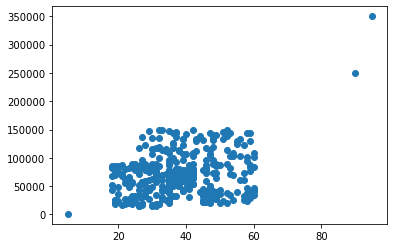

In [45]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [47]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

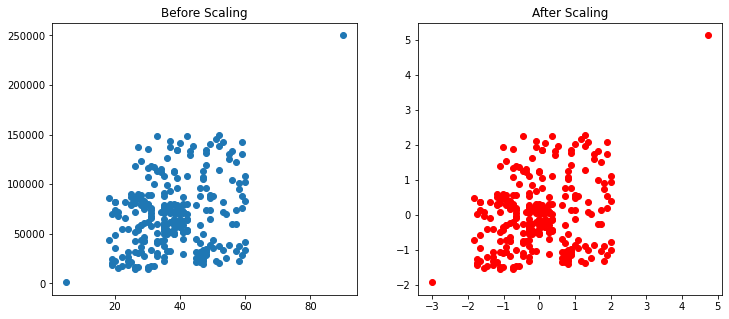

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [50]:
 # no any effect for outlier in data . it work sem as asusal.

## 2) Normalization:

In [52]:
df = pd.read_csv('data/Wine_data.txt',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [53]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

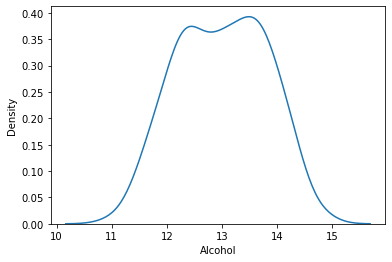

In [54]:

sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

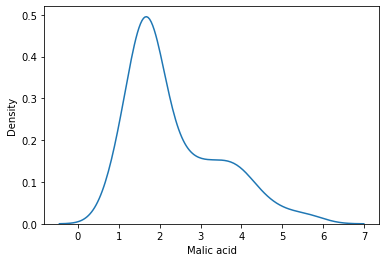

In [55]:
sns.kdeplot(df['Malic acid'])

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

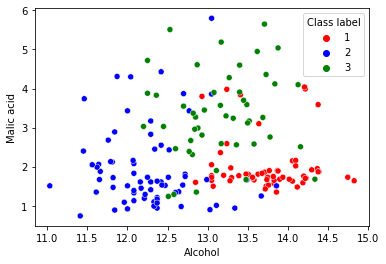

In [56]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_trez_scaled = scaler.transform(X_test)

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [62]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [63]:
np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [64]:
np.round(X_test.describe(), 1)


,Alcohol,Malic acid
count,54.0,54.0
mean,13.0,2.2
std,0.8,1.1
min,11.4,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.7,2.7
max,14.8,5.8


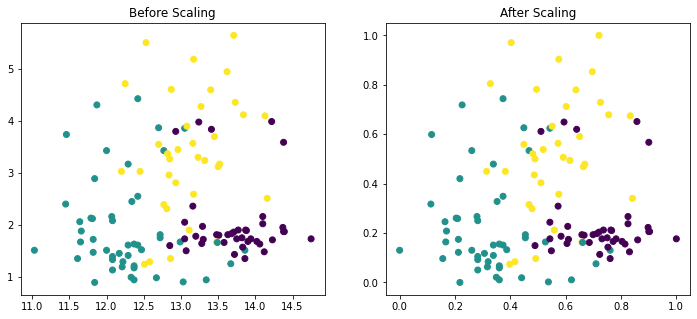

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

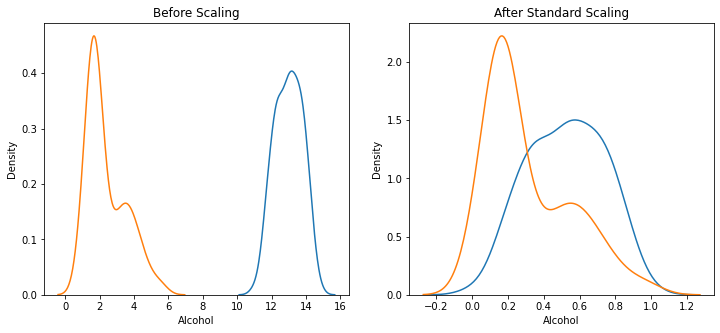

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

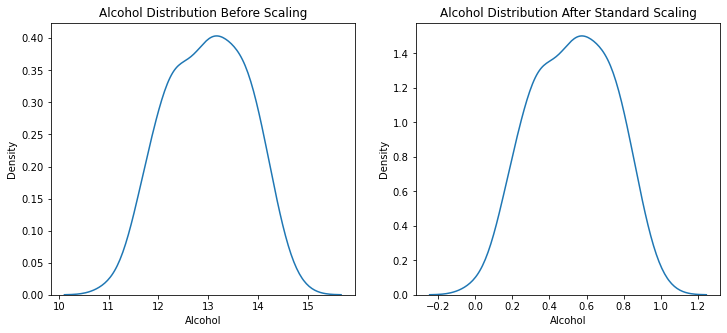

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()


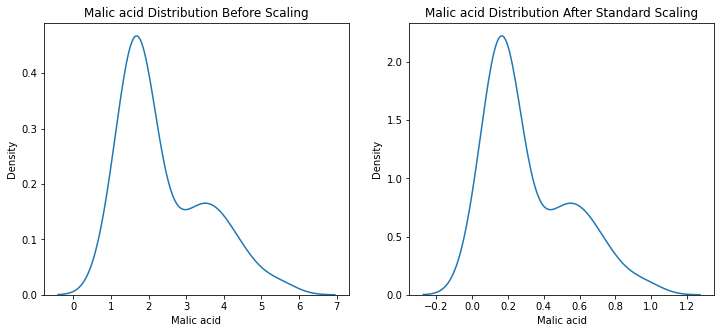

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

## You uesd other scaling :

* 1) Minmax Scaler - for you konw MIN value and max value in data 
* 2) MaxAbs Scaler -  if in data spars maxtic in youd max 
* 3) Robust Sclaer -  it uesd too much outlier in data .

In [69]:
from sklearn.preprocessing import MinMaxScaler,MinMaxScaler,RobustScaler

In [70]:
 from sklearn.preprocessing import MinMaxScaler

In [71]:
 from sklearn.preprocessing import RobustScaler